<a href="https://colab.research.google.com/github/navgaur/Mathematical-Physics-II/blob/test1/Series1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u> **Unit 3** </u>   

### **To approximate the elementary functions (e.g. exp(x), sin(x), cos(x), ln(1+x), etc.) by a finite number of terms of Taylor’s series and discuss the truncation error. To plot the function as well the nth partial sum of its series for various values of n on the same graph and visualise the convergence of series.**

### **Series expansion of $e^x$**

$$e^x = \sum_{n=0}^\infty \frac{x^n}{n!} $$

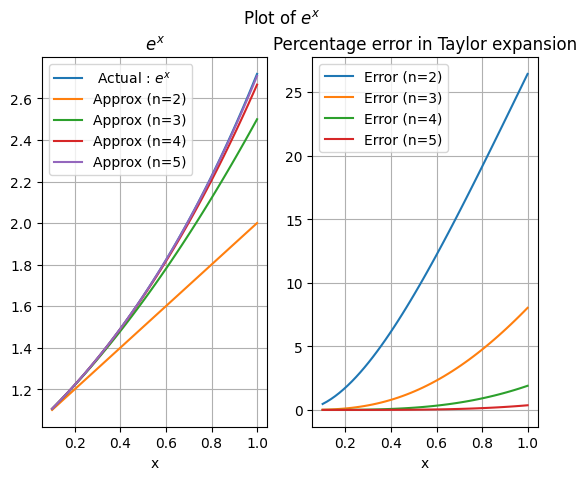

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def taylor_exp(x,n):
  sum = 0
  for i in range(n):
    t = x**i/np.math.factorial(i)
    sum += t
  return sum

# Actual function
x_values = np.linspace(0.1,1,50)
y_values = np.exp(x_values)


fig,axs=plt.subplots(1,2,sharex=True)
fig.suptitle("Plot of $e^x$")

axs[0].set_title("$e^x$")
axs[0].plot(x_values,y_values,label =' Actual : $e^x$')
axs[1].set_title("Percentage error in Taylor expansion")

# The function via Taylor series
for n in [2,3,4,5]:
  y_approx = [taylor_exp(x,n) for x in x_values]
  y_error = np.abs(y_approx-y_values)*100/y_values
  axs[0].plot(x_values,y_approx, label=f'Approx (n={n})')
  axs[1].plot(x_values,y_error, label=f'Error (n={n})')

axs[0].set_xlabel('x')
axs[0].grid()
axs[0].legend()

axs[1].set_xlabel('x')
axs[1].grid()
axs[1].legend()
fig.show()

### **Series expansion of $sin(x)$**

$$sin(x) = \sum_{n=0}^\infty \frac{(-1)^n  x^{2n+1}}{(2n + 1)!} $$

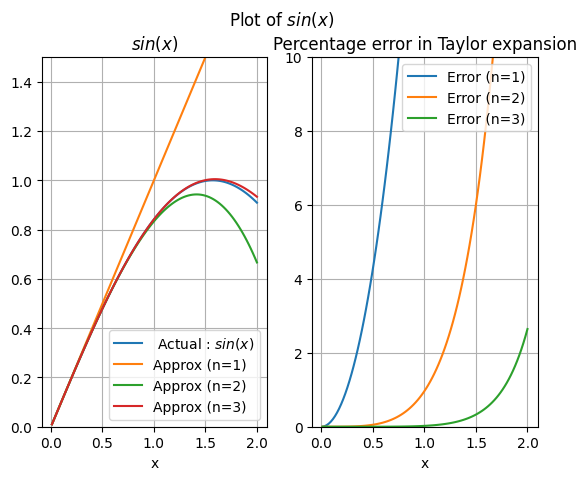

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def taylor_sin(x,n):
  sum = np.sum([(-1)**k * x**(2*k+1)/np.math.factorial(2*k+1) for k in range(n)])
  return sum

# Actual function
x_values = np.linspace(0.01,2,100)
y_values = np.sin(x_values)

fig,axs=plt.subplots(1,2,sharex=True)
fig.suptitle("Plot of $sin(x)$")

axs[0].set_title("$sin(x)$")
axs[0].set_ylim([0,1.5])
axs[0].plot(x_values,y_values,label =' Actual : $sin(x)$')
axs[1].set_title("Percentage error in Taylor expansion")
axs[1].set_ylim([0,10])

# The function via Taylor series
for n in [1,2,3]:
  y_approx = [taylor_sin(x,n) for x in x_values]
  y_error = np.abs(y_approx-y_values)*100/y_values
  axs[0].plot(x_values,y_approx, label=f'Approx (n={n})')
  axs[1].plot(x_values,y_error, label=f'Error (n={n})')

axs[0].set_xlabel('x')
axs[0].grid()
axs[0].legend()

axs[1].set_xlabel('x')
axs[1].grid()
axs[1].legend()
fig.show()

## **Series expansion of $ln(1+x)$**

$$ln(1 + x) = - \sum_{n=1}^\infty \frac{(-1)^{k} x^k}{k} $$

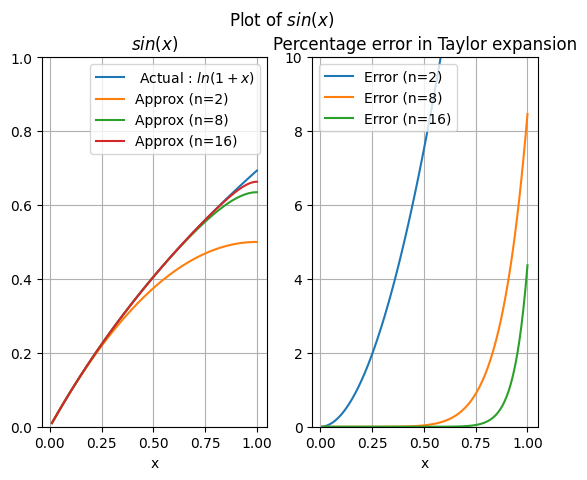

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def taylor_ln(x,n):
  s = - np.sum([((-1)**k * x**k)/k for k in range(1,n+1)])
  return s

# Actual function
x_values = np.linspace(0.01,1,100)
y_values = np.log(1+x_values)

fig,axs=plt.subplots(1,2,sharex=True)
fig.suptitle("Plot of $sin(x)$")

axs[0].set_title("$sin(x)$")
axs[0].set_ylim([0,1])
axs[0].plot(x_values,y_values,label =' Actual : $ln(1+x)$')
axs[1].set_title("Percentage error in Taylor expansion")
axs[1].set_ylim([0,10])

# The function via Taylor series
for n in [2,8,16]:
  y_approx = [taylor_ln(x,n) for x in x_values]
  y_error = np.abs(y_approx-y_values)*100/y_values
  axs[0].plot(x_values,y_approx, label=f'Approx (n={n})')
  axs[1].plot(x_values,y_error, label=f'Error (n={n})')

axs[0].set_xlabel('x')
axs[0].grid()
axs[0].legend()

axs[1].set_xlabel('x')
axs[1].grid()
axs[1].legend()
fig.show()

## **Legendre Polynomials using series expansion and verifying recurrence  relation**

$$P_n(x) = \sum_{k=0}^{M} \frac{(-1)^k (2 n - 2 k)!}{2^n k! (n-k)! (n-2k)!} x^{n-2k}$$

where $M$ = $n/2$ or $(n-1)/2$ whichever is an integer.



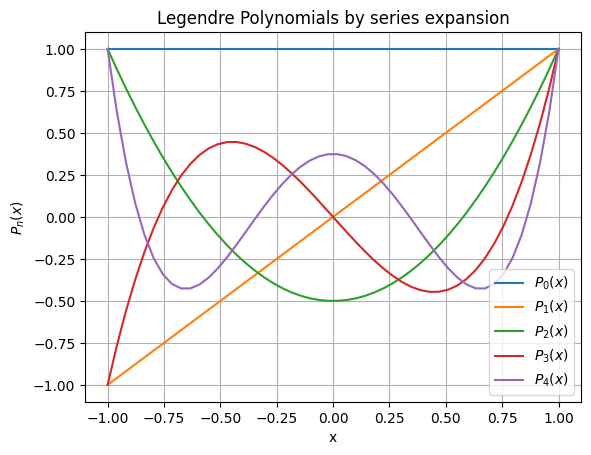

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.special import legendre,eval_legendre

def poly_legendre(x,n):
  t1 = 0
  for i in range(floor(n/2)+1):
    t1 += (-1)**i * factorial(2*n - 2*i)/(2**n*factorial(i) * factorial(n-i)*factorial(n-2*i))*x**(n-2*i)
  return t1

#x= 0
#n= 2
#print('Polynomial :', poly_legendre(x,n),eval_legendre(n,x))

x=np.linspace(-1,1,50)
for i in range(5):
  y=poly_legendre(x,i)
  plt.plot(x,y,label='$P_{}(x)$'.format(i))
plt.xlabel('x')
plt.ylabel('$P_n(x)$')
plt.title('Legendre Polynomials by series expansion')
plt.legend()
plt.grid()
plt.show()



### **Recurrence Relation for Legendre Polynomials**

$$(2n + 1) x P_n(x) = (n + 1) P_{n+1}(x) + n P_{n-1}(x)$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.special import legendre,eval_legendre

def poly_legendre(x,n):
  t1 = 0
  for i in range(floor(n/2)+1):
    t1 += (-1)**i * factorial(2*n - 2*i)/(2**n*factorial(i) * factorial(n-i)*factorial(n-2*i))*x**(n-2*i)
  return t1

x=0.1
n=5

check= (2*n+1)*x*poly_legendre(x,n) - (n+1)*poly_legendre(x,n+1) - n*poly_legendre(x,n-1)

print(check)

0.0
